<a href="https://colab.research.google.com/github/rajdepot/computerVision/blob/cv_sem5/Rnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Setup & Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)
tf.random.set_seed(42)
np.random.seed(42)


TensorFlow: 2.19.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images: (60000, 28, 28) Train labels: (60000,)
Test images: (10000, 28, 28) Test labels: (10000,)


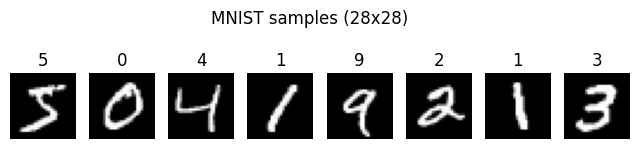

In [ ]:
# Cell 2: Explain & Load MNIST
# MNIST = 70,000 images of digits (0..9), each 28x28 grayscale
# Standard split: 60,000 train / 10,000 test (from tf.keras.datasets)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train images:", x_train.shape, "Train labels:", y_train.shape)
print("Test images:", x_test.shape,  "Test labels:", y_test.shape)

# Show a few examples
plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(int(y_train[i]))
    plt.axis("off")
plt.suptitle("MNIST samples (28x28)")
plt.show()


In [ ]:
# Cell 3: Preprocess
# 1) Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# 2) Treat each image row as one time step:
#    (samples, time_steps, features) = (N, 28, 28)
x_train = x_train.reshape((-1, 28, 28))
x_test  = x_test.reshape((-1, 28, 28))

# Build tf.data pipelines for speed
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(10000)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

print("Train ds:", train_ds)
print("Test ds:", test_ds)


Train ds: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>
Test ds: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>


In [ ]:
# Cell 4: Build a simple RNN classifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    # Input: sequences length 28, each step has 28 features
    SimpleRNN(128, activation="tanh", input_shape=(28, 28)),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,386 (83.54 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 5: Train for 6 epochs
EPOCHS = 6
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7860 - loss: 0.7274 - val_accuracy: 0.9410 - val_loss: 0.2050
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9361 - loss: 0.2183 - val_accuracy: 0.9470 - val_loss: 0.1726
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9542 - loss: 0.1575 - val_accuracy: 0.9517 - val_loss: 0.1570
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9610 - loss: 0.1354 - val_accuracy: 0.9636 - val_loss: 0.1210
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9659 - loss: 0.1190 - val_accuracy: 0.9578 - val_loss: 0.1397
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9660 - loss: 0.1176 - val_accuracy: 0.9684 - val_loss: 0.1068


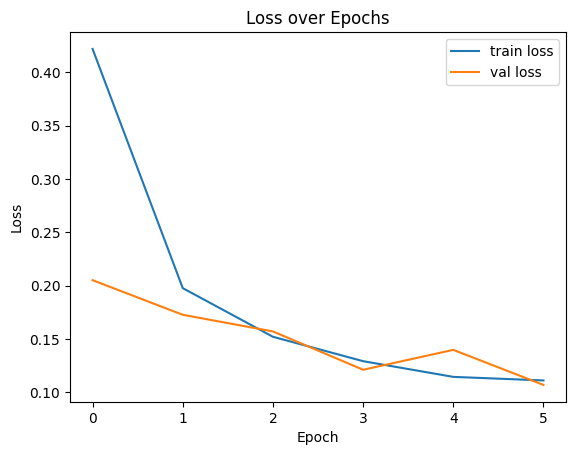

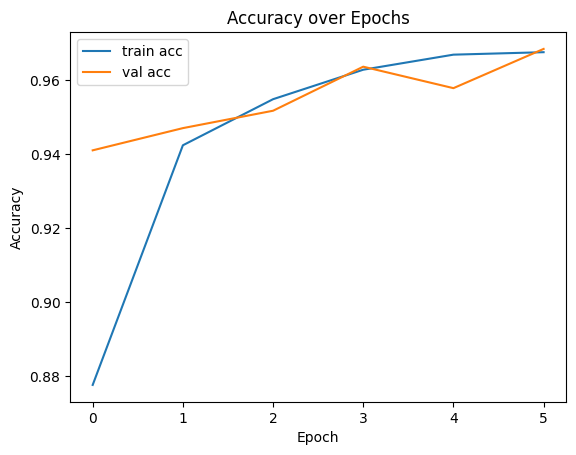

In [ ]:
# Cell 6: Plot training curves
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss over Epochs")
plt.legend(); plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy over Epochs")
plt.legend(); plt.show()


In [ ]:
# Cell 7: Evaluate
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Test Loss: 0.1068 | Test Accuracy: 0.9684


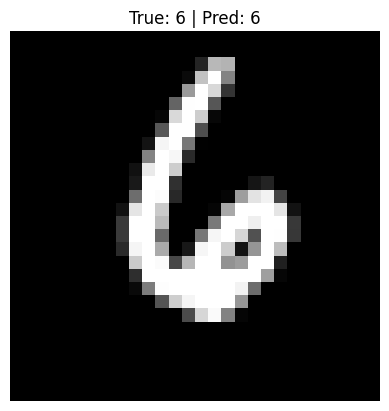

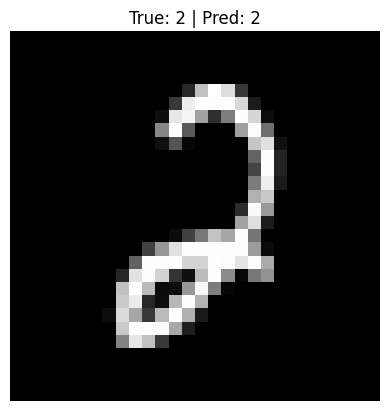

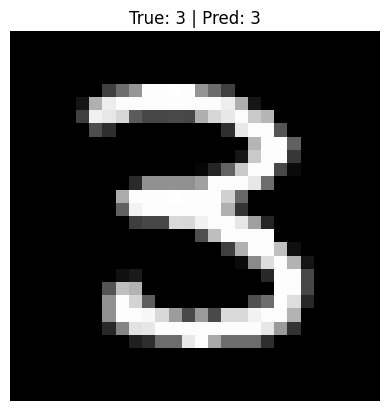

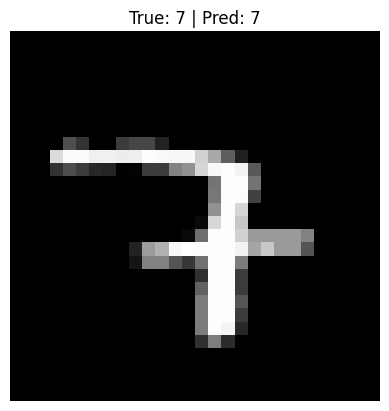

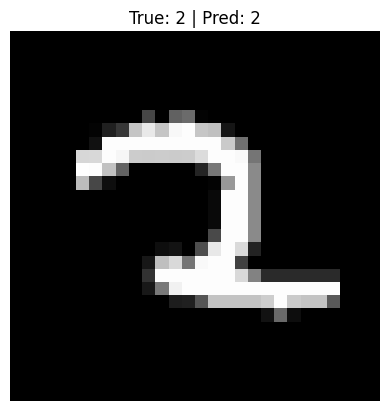

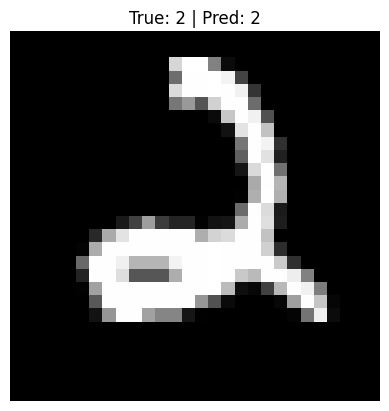

Predicted class probabilities for the first sample:
 [8.4290637e-05 1.5304435e-05 3.0313851e-05 4.0822997e-05 1.0616713e-03
 1.9462065e-04 9.9829632e-01 8.4260404e-07 6.8740723e-05 2.0709180e-04]


In [ ]:
# Cell 8: Inference — predict on a few test images and visualize
num_samples = 6
idx = np.random.choice(len(x_test), num_samples, replace=False)
sample_imgs = x_test[idx]           # shape: (num_samples, 28, 28)
sample_labels = y_test[idx]

probs = model.predict(sample_imgs, verbose=0)  # (num_samples, 10)
preds = np.argmax(probs, axis=1)

for i in range(num_samples):
    plt.figure()
    plt.imshow(sample_imgs[i], cmap="gray")
    plt.title(f"True: {sample_labels[i]} | Pred: {preds[i]}")
    plt.axis("off")
    plt.show()

print("Predicted class probabilities for the first sample:\n", probs[0])


# New Section